Story - 6 : What Is The State of Food Security and Nutrition in the US
The United Nations Food and Agriculture Organization publication, The State of Food Security and Nutrition in the World 2022 (https://www.fao.org/documents/card/en/c/cc0639en) might lead one to the conclusion that it's an elsewhere problem. That the people who are suffering malnutrition and starvation are "elsewhere", not in our backyard. For this assignment you will need to take a closer look here at home (the US)
Notes:
You will need to locate and source data that reflects food security and nutrition by state broken down by men, women, children and by age groups

Your analysis should demonstrate correlations that exist between level of poverty and food insecurity, malnutrition and starvation.

Your data and analysis should also indicate what happens to the children as they mature into adults. Will they become fully functional citizens or will they require continued support?

You data visualizations need to tell the story for a political audience that you were lobbying to address the issue of food insecurity in the US

This assignment is due at the end of the week twelve of the semester.

#### Sources

https://www.cdc.gov/nchs/data/hestat/obesity-adult-17-18/obesity-adult.htm
https://www.epa.gov/americaschildrenenvironment/americas-children-and-environment-data-tables
https://www.cdc.gov/nchs/products/databriefs/db465.htm#:~:text=Key%20findings-,Data%20from%20the%20National%20Health%20Interview%20Survey,%25)%20than%20men%20(5.2%25).
https://peerta.acf.hhs.gov/content/long-term-health-consequences-childhood-food-insecurity
https://frac.org/wp-content/uploads/hunger-health-impact-poverty-food-insecurity-health-well-being.pdf
https://nccd.cdc.gov/dnpao_dtm/rdPage.aspx?rdReport=DNPAO_DTM.ExploreByTopic&islClass=OWS&islTopic=&go=GO
https://www.census.gov/library/publications/2023/demo/p60-280.html#:~:text=Highlights-,Official%20Poverty%20Measure,and%20Table%20A%2D1).
https://www.dailykos.com/stories/2020/11/19/1163009/-Daily-Kos-Elections-presidential-results-by-congressional-district-for-2020-2016-and-2012
https://public.opendatasoft.com/explore/dataset/us-county-boundaries/export/?flg=en-us&disjunctive.statefp&disjunctive.countyfp&disjunctive.name&disjunctive.namelsad&disjunctive.stusab&disjunctive.state_name&sort=countyfp
https://www.ers.usda.gov/topics/food-nutrition-assistance/food-security-in-the-u-s/interactive-charts-and-highlights/#trends

In [ ]:
1) add a map starting with food insecurity rates..incorporate congressional map and show it's a problem everywhere
2) talk about income disparity chart
3) racial disparity chart
4) review correlation map: with poverty (need to build)
5) obesity end that will have long term cost impacts

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import re
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from matplotlib.lines import Line2D
from matplotlib.patches import Rectangle
import plotly.express as px
import statsmodels.api as sm
from plotly.offline import iplot
import plotly.io as pio
pio.renderers.default='notebook'
from IPython.display import Image

In [3]:
food_df = pd.read_excel('/Users/JoshForster/Downloads/MMG2023_2019-2021_Data_ToShare.xlsx',sheet_name='State')
food_df.head()                   

,FIPS,State Name,State,Year,Overall Food Insecurity Rate,# of Food Insecure Persons Overall,Food Insecurity Rate among Black Persons (all ethnicities),Food Insecurity Rate among Hispanic Persons (any race),"Food Insecurity Rate among White, non-Hispanic Persons",Low Threshold in state,...,# of Food Insecure Older Adults\n(State of Senior Hunger),Older Adult Very Low Food Security Rate\n(State of Senior Hunger),# of Very Low Food Secure Older Adults\n(State of Senior Hunger),Child Food Insecurity Rate,# of Food Insecure Children,% food insecure Children in HH w/HH Incomes Below 185 FPL,% food insecure Children in HH w/HH Incomes Above 185 FPL,Cost Per Meal,Weighted weekly $ needed by FI,Weighted Annual Food Budget Shortfall
0,1,Alabama,AL,2021,0.148,746550,0.26,0.12,0.10,1.30,...,100289,0.056,38714,0.183,204830,0.77,0.23,3.50,20.363445,461137000
1,2,Alaska,AK,2021,0.107,78260,0.19,0.12,0.08,1.30,...,6184,0.028,2156,0.128,22960,0.73,0.27,4.25,24.768164,58797000
2,4,Arizona,AZ,2021,0.103,751690,0.20,0.14,0.08,1.85,...,79721,0.049,46563,0.140,226080,0.68,0.32,3.30,19.214580,438117000
3,5,Arkansas,AR,2021,0.155,467550,0.25,0.16,0.13,1.30,...,75302,0.096,36311,0.191,134690,0.73,0.27,3.18,18.498904,262358000
4,6,California,CA,2021,0.105,4104060,0.18,0.13,0.06,2.00,...,485709,0.039,184771,0.135,1182720,0.66,0.34,3.67,21.357532,2658795000


In [4]:
food_df.columns

Index(['FIPS', 'State Name', 'State', 'Year', 'Overall Food Insecurity Rate ',
       '# of Food Insecure Persons Overall ',
       'Food Insecurity Rate among Black Persons (all ethnicities)',
       'Food Insecurity Rate among Hispanic Persons (any race)',
       'Food Insecurity Rate among White, non-Hispanic Persons ',
       'Low Threshold in state', 'Low Threshold Type',
       'High Threshold in state', 'High Threshold Type',
       '% FI ≤ Low Threshold', '% FI Btwn Thresholds', '% FI > High Threshold',
       '% FI > Low Threshold',
       'Senior Food Insecurity Rate\n(State of Senior Hunger)',
       '# of Food Insecure Seniors\n(State of Senior Hunger)',
       'Senior Very Low Food Security Rate\n(State of Senior Hunger)',
       '# of Very Low Food Secure Seniors\n(State of Senior Hunger)',
       'Older Adult Food Insecurity Rate\n(State of Senior Hunger)',
       '# of Food Insecure Older Adults\n(State of Senior Hunger)',
       'Older Adult Very Low Food Security Rate

In [9]:
sub_df = food_df[['State','Year','% food insecure Children in HH w/HH Incomes Below 185 FPL','% food insecure Children in HH w/HH Incomes Above 185 FPL']]
slope_df = sub_df.rename(columns={'% food insecure Children in HH w/HH Incomes Below 185 FPL':'below','% food insecure Children in HH w/HH Incomes Above 185 FPL':'above'})
slope_df.loc[:,'diff'] = slope_df.apply(lambda x: x['below']-x['above'],axis=1)
slope_df.head()

,State,Year,below,above,diff
0,AL,2021,0.77,0.23,0.54
1,AK,2021,0.73,0.27,0.46
2,AZ,2021,0.68,0.32,0.36
3,AR,2021,0.73,0.27,0.46
4,CA,2021,0.66,0.34,0.32


In [10]:
slope_melt = pd.melt(slope_df, id_vars=['Year','State','diff'], value_vars=['below','above'])
slope_melt.sort_values(by='diff',ascending=False).head()

,Year,State,diff,variable,value
227,2020,MN,0.82,above,0.09
74,2020,MN,0.82,below,0.91
81,2020,NJ,0.76,below,0.88
234,2020,NJ,0.76,above,0.12
23,2021,MN,0.72,below,0.86


In [11]:
slope_melt[slope_melt['Year']==2021].sort_values(by='diff',ascending=False).head()

,Year,State,diff,variable,value
23,2021,MN,0.72,below,0.86
176,2021,MN,0.72,above,0.14
165,2021,ID,0.64,above,0.18
12,2021,ID,0.64,below,0.82
183,2021,NJ,0.61,above,0.19


In [12]:
slope_melt[slope_melt['Year'].isin([2020,2021])]

,Year,State,diff,variable,value
0,2021,AL,0.54,below,0.77
1,2021,AK,0.46,below,0.73
2,2021,AZ,0.36,below,0.68
3,2021,AR,0.46,below,0.73
4,2021,CA,0.32,below,0.66
...,...,...,...,...,...
250,2020,VA,0.50,above,0.25
251,2020,WA,0.34,above,0.33
252,2020,WV,0.54,above,0.23
253,2020,WI,0.64,above,0.18


In [15]:
slope_df.loc[:,'diff']=slope_df.apply(lambda row: row['below']-row['above'],axis=1)
slope_df.sort_values(by='diff',ascending=False).head(20)

,State,Year,below,above,diff
74,MN,2020,0.91,0.09,0.82
81,NJ,2020,0.88,0.12,0.76
23,MN,2021,0.86,0.14,0.72
63,ID,2020,0.85,0.15,0.70
83,NY,2020,0.85,0.15,0.70
72,MA,2020,0.84,0.16,0.68
65,IN,2020,0.83,0.17,0.66
73,MI,2020,0.83,0.17,0.66
12,ID,2021,0.82,0.18,0.64
56,CO,2020,0.82,0.18,0.64


In [16]:
region = {}
sub_region = {}
region['Northeast']= ['New England','Middle Atlantic']
region['Midwest']= ['East North Central','West North Central']
region['South']=['South Atlantic','East South Central','West South Central']
region['West']=['Mountain','Pacific']
sub_region['New England'] = ['Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'Rhode Island', 'Vermont']
sub_region['Middle Atlantic']=['New Jersey', 'New York', 'Pennsylvania']
sub_region['South Atlantic']=['Delaware', 'Maryland','District Of Columbia', 'Florida','Georgia', 'North Carolina', 'South Carolina', 'Virginia', 'West Virginia']
sub_region['East South Central']=['Alabama' ,'Kentucky', 'Mississippi', 'Tennessee'] 
sub_region['West South Central']=['Arkansas','Oklahoma', 'Texas','Louisiana' ]                               
sub_region['West North Central']=['Iowa', 'Kansas',  'Minnesota','Missouri', 'Nebraska','North Dakota', 'South Dakota']
sub_region['East North Central']=['Illinois', 'Indiana' , 'Michigan', 'Ohio', 'Wisconsin']
sub_region['Mountain'] = ['Arizona', 'New Mexico','Colorado','Idaho', 'Montana', 'Nevada', 'Utah', 'Wyoming']
sub_region['Pacific']= ['Alaska', 'California', 'Hawaii', 'Oregon' , 'Washington']

In [17]:
def pop_subregion_detail(input_value):
    '''
    This function takes a state value and returns the US Census assigned division
    '''
    key = [k for k,v in sub_region.items() if input_value.strip().title() in v]
    if len(key)>0:
 
        return(key[0])
def pop_region_detail(input_value):
    '''
    This function takes a division of the United States and returns a region as specified by the US government
    '''
    #print(region.items())
    if ~pd.isna(input_value) or ~input_value is None:
        key = [k for k,v in region.items() if input_value.strip().title() in v]
    if len(key)>0:
        return(key[0])


In [18]:
food_df.loc[:,'subregion'] = food_df['State Name'].apply(pop_subregion_detail)
food_df.loc[:,'region']= food_df['subregion'].apply(pop_region_detail)

In [19]:
region_food_df = food_df[['region','State','Year','Food Insecurity Rate among Black Persons (all ethnicities)',
       'Food Insecurity Rate among Hispanic Persons (any race)',
       'Food Insecurity Rate among White, non-Hispanic Persons ','Overall Food Insecurity Rate ']]
region_food_df.rename(columns=\
                      {'Food Insecurity Rate among Black Persons (all ethnicities)':'black_insec_rate',\
                       'Food Insecurity Rate among Hispanic Persons (any race)':'hispanic_insec_rate',\
                       'Food Insecurity Rate among White, non-Hispanic Persons ':'white_insec_rate',\
                       'Overall Food Insecurity Rate ':'overall_insec_rate'},inplace=True)
region_food_df.head()

,region,State,Year,black_insec_rate,hispanic_insec_rate,white_insec_rate,overall_insec_rate
0,South,AL,2021,0.26,0.12,0.10,0.148
1,West,AK,2021,0.19,0.12,0.08,0.107
2,West,AZ,2021,0.20,0.14,0.08,0.103
3,South,AR,2021,0.25,0.16,0.13,0.155
4,West,CA,2021,0.18,0.13,0.06,0.105


In [21]:
gender_df = pd.read_excel('/Users/JoshForster/Downloads/story6_data.xlsx',sheet_name='gender_food_insec')
adult_obese_df = pd.read_excel('/Users/JoshForster/Downloads/story6_data.xlsx',sheet_name='adult_obesity')
child_obese_df = pd.read_excel('/Users/JoshForster/Downloads/child_obesity 1976-2016.xlsx',sheet_name='Sheet1',skiprows=2)

In [22]:
gender_df.head(10)
gender_df = gender_df[gender_df['data'].str.contains('. .')]
gender_df.loc[:,'category'] = gender_df['data'].apply(lambda x: re.sub('(\w+)\s{2,}(.*)',r'\1',re.sub('\s\.\s','',re.sub('\. \.','',x))))
gender_df.loc[:,'rate'] = gender_df['data'].apply(lambda x: re.sub('(\w+)\s{2,}(\d\.\d)\s.*|(\d{2}[\-\s]\d{2})\s{2,}(\d\.\d)\s.*',r'\2',re.sub('\s\.\s','',re.sub('\. \.','',x)))[-3:]).astype(float)/100
gender_df.loc[:,'low_band'] = gender_df['data'].apply(lambda x: re.sub('.*\((\d\.\d)–(\d\.\d)\)',r'\1',x)).astype(float)/100
gender_df.loc[:,'top_band'] = gender_df['data'].apply(lambda x: re.sub('.*\((\d\.\d)–(\d\.\d)\)',r'\2',x)).astype(float)/100

In [23]:
gender_df.dtypes

data         object
category     object
rate        float64
low_band    float64
top_band    float64
dtype: object

In [24]:
gender_df.head(10) #(\d\.\d)\(((\d\.\d))\-(\d\.\d)

,data,category,rate,low_band,top_band
0,Total. . . . . . . . . . . . . . . . . 5.9 0.2...,Total,0.059,0.055,0.063
2,Men . . . . . . . . . . . . . . . . . 5.2 0.3 ...,Men,0.052,0.047,0.058
3,Women . . . . . . . . . . . . . . 6.5 0.3 (6.0...,Women,0.065,0.060,0.071
5,18–34. . . . . . . . . . . . . . . . 6.7 0.4 (...,18–34,0.067,0.059,0.075
6,35–44. . . . . . . . . . . . . . . . 6.1 0.4 (...,35–44,0.061,0.053,0.070
7,45–54. . . . . . . . . . . . . . . . 6.9 0.5 (...,45–54,0.069,0.060,0.080
8,55–64. . . . . . . . . . . . . . . . 6.4 0.5 (...,55–64,0.064,0.055,0.074
9,65 and over . . . . . . . . . . . 3.5 0.3 (3.0...,65 and over,0.035,0.030,0.041


In [26]:
food_age_df = food_df[['State', 'Year', 'Overall Food Insecurity Rate ',
       'Senior Food Insecurity Rate\n(State of Senior Hunger)',
      
       'Senior Very Low Food Security Rate\n(State of Senior Hunger)',
       'Older Adult Food Insecurity Rate\n(State of Senior Hunger)',
       'Older Adult Very Low Food Security Rate\n(State of Senior Hunger)',
       'Child Food Insecurity Rate ']].rename(columns={'Overall Food Insecurity Rate ':'gen_insec_rate',\
                                                       'Senior Food Insecurity Rate\n(State of Senior Hunger)':'senior_insec_rate',\
                                                       'Senior Very Low Food Security Rate\n(State of Senior Hunger)':'senior_bad_insec_rate',\
                                                      'Older Adult Food Insecurity Rate\n(State of Senior Hunger)':'adult_insec_rate',\
                                                       'Older Adult Very Low Food Security Rate\n(State of Senior Hunger)':'adult_bad_insec_rate',\
                                                       'Child Food Insecurity Rate ':'child_insec_rate'})
food_age_df.head()

,State,Year,gen_insec_rate,senior_insec_rate,senior_bad_insec_rate,adult_insec_rate,adult_bad_insec_rate,child_insec_rate
0,AL,2021,0.148,0.089,0.030,0.144,0.056,0.183
1,AK,2021,0.107,0.084,0.023,0.080,0.028,0.128
2,AZ,2021,0.103,0.074,0.028,0.085,0.049,0.140
3,AR,2021,0.155,0.076,0.033,0.198,0.096,0.191
4,CA,2021,0.105,0.074,0.024,0.104,0.039,0.135


In [27]:
food_age_df.columns

Index(['State', 'Year', 'gen_insec_rate', 'senior_insec_rate',
       'senior_bad_insec_rate', 'adult_insec_rate', 'adult_bad_insec_rate',
       'child_insec_rate'],
      dtype='object')

In [28]:
food_age_df.groupby('Year')['gen_insec_rate', 'senior_insec_rate',
       'senior_bad_insec_rate', 'adult_insec_rate', 'adult_bad_insec_rate',
       'child_insec_rate'].mean()

,gen_insec_rate,senior_insec_rate,senior_bad_insec_rate,adult_insec_rate,adult_bad_insec_rate,child_insec_rate
Year,,,,,,
2019,0.116529,0.070059,0.027039,0.100196,0.042020,0.155882
2020,0.100686,0.066294,0.025333,0.099725,0.042824,0.142255
2021,0.105020,0.065608,0.024314,0.098431,0.039686,0.132863


In [30]:
adult_obese_df.head()

,survey_period,end_survey,Sample,all_overweight,all_obesity,all_severe_obesity,male_overweight,male_obesity,male_severe_obesity,female_overweight,female_obesity,female_severe_obesity
0,1988-1994,1994,16235,33.1 (0.6),22.9 (0.7),2.8 (0.2),40.7 (0.8),20.2 (0.7),1.7 (0.3),25.9 (0.7),25.4 (0.9),3.9 (0.3)
1,1999-2000,2000,4117,34.0 (1.0),30.5 (1.5),4.7 (0.6),39.7 (1.4),27.5 (1.5),3.1 (0.7),28.6 (1.6),33.4 (1.7),6.2 (0.7)
2,2001-2002,2002,4413,35.1 (1.1),30.5 (1.1),5.1 (0.5),42.2 (1.3),27.7 (1.0),3.6 (0.6),28.2 (1.7),33.2 (1.5),6.5 (0.6)
3,2003-2004,2004,4431,34.1 (1.1),32.2 (1.2),4.8 (0.6),39.7 (1.5),31.1 (1.3),2.8 (0.4),28.6 (1.2),33.2 (1.7),6.9 (0.9)
4,2005-2006,2006,4356,32.6 (0.8),34.3 (1.4),5.9 (0.5),39.9 (1.3),33.3 (2.0),4.2 (0.5),25.5 (1.2),35.3 (1.4),7.4 (0.7)


In [31]:
def elim_paren(input_str):
    return ''+ re.sub('(.*)\s\(.*',r'\1',re.sub('\n','',str(input_str)))

In [32]:
adult_obese_df.filter(regex='.*overweight.*|.*obesity.*').dtypes

all_overweight           object
all_obesity              object
all_severe_obesity       object
male_overweight          object
male_obesity             object
male_severe_obesity      object
female_overweight        object
female_obesity           object
female_severe_obesity    object
dtype: object

In [33]:
def elim_paren(input_str):
    return ''+ re.sub('(.*)\s\(.*',r'\1',re.sub('\n','',str(input_str)))
num_rep_df = adult_obese_df.filter(regex='.*overweight.*|.*obesity.*')
obese_df = pd.concat([adult_obese_df[['survey_period','end_survey','Sample']],num_rep_df.applymap(elim_paren).astype(float)],axis=1)
obese_df.dtypes

survey_period             object
end_survey                 int64
Sample                     int64
all_overweight           float64
all_obesity              float64
all_severe_obesity       float64
male_overweight          float64
male_obesity             float64
male_severe_obesity      float64
female_overweight        float64
female_obesity           float64
female_severe_obesity    float64
dtype: object

In [34]:
obese_df.head()

,survey_period,end_survey,Sample,all_overweight,all_obesity,all_severe_obesity,male_overweight,male_obesity,male_severe_obesity,female_overweight,female_obesity,female_severe_obesity
0,1988-1994,1994,16235,33.1,22.9,2.8,40.7,20.2,1.7,25.9,25.4,3.9
1,1999-2000,2000,4117,34.0,30.5,4.7,39.7,27.5,3.1,28.6,33.4,6.2
2,2001-2002,2002,4413,35.1,30.5,5.1,42.2,27.7,3.6,28.2,33.2,6.5
3,2003-2004,2004,4431,34.1,32.2,4.8,39.7,31.1,2.8,28.6,33.2,6.9
4,2005-2006,2006,4356,32.6,34.3,5.9,39.9,33.3,4.2,25.5,35.3,7.4


In [35]:
child_ob_melt_df = pd.melt(child_obese_df,id_vars='Age Group',var_name='years',value_name='rate')
child_obese_melt_df = child_ob_melt_df[child_ob_melt_df['Age Group']=='Ages 2-17 years']
child_obese_melt_df.loc[:,'year'] = child_obese_melt_df['years'].apply(lambda x: x[-4:]).astype(int)
child_obese_melt_df.head()

,Age Group,years,rate,year
4,Ages 2-17 years,1976-1980,5.440348,1980
12,Ages 2-17 years,1988-1991,9.387850,1991
20,Ages 2-17 years,1991-1994,11.011567,1994
28,Ages 2-17 years,1999-2000,13.776246,2000
36,Ages 2-17 years,2001-2002,15.200669,2002


In [36]:
obese_full_df = pd.merge(obese_df,child_obese_melt_df,how='inner',left_on='end_survey',right_on='year')
obese_full_df.shape

(10, 16)

In [37]:
obese_full_df.columns

Index(['survey_period', 'end_survey', 'Sample', 'all_overweight',
       'all_obesity', 'all_severe_obesity', 'male_overweight', 'male_obesity',
       'male_severe_obesity', 'female_overweight', 'female_obesity',
       'female_severe_obesity', 'Age Group', 'years', 'rate', 'year'],
      dtype='object')

#### 

In [39]:
pov_df = pd.read_excel('/Users/JoshForster/Downloads/tableA3_hist_pov_by_all_and_age.xlsx',skiprows=8,nrows=73-8-7,header=None)
pov_df.columns = ['yr','all_total','all_num','all_perc','under_18_total','under_18_num','under_18_perc','adult_total','adult_num','adult_perc','senior_total','senior_num','senior_perc']
pov_df.shape

(58, 13)

In [40]:
pov_df.tail()

,yr,all_total,all_num,all_perc,under_18_total,under_18_num,under_18_perc,adult_total,adult_num,adult_perc,senior_total,senior_num,senior_perc
53,1970,202200,25420,12.6,69160,10440,15.1,113600,10190,9.0,19470,4793,24.6
54,1969,199500,24150,12.1,69090,9691,14.0,111500,9669,8.7,18900,4787,25.3
55,1968,197600,25390,12.8,70390,10950,15.6,108700,9803,9.0,18560,4632,25.0
56,196722,195700,27770,14.2,70410,11660,16.6,107000,10730,10.0,18240,5388,29.5
57,1966,193400,28510,14.7,70220,12390,17.6,105200,11010,10.5,17930,5114,28.5


In [41]:
pov_df.loc[:,'Year'] = pov_df['yr'].apply(lambda x: x if len(str(x))==4 else str(x)[:4]).astype(int)
pov_df.head()

,yr,all_total,all_num,all_perc,under_18_total,under_18_num,under_18_perc,adult_total,adult_num,adult_perc,senior_total,senior_num,senior_perc,Year
0,2021,328200,37930,11.6,72940,11150,15.3,199100,20980,10.5,56190,5802,10.3,2021
1,20201,327600,37550,11.5,73540,11790,16.0,199800,20910,10.5,54280,4852,8.9,2020
2,2019,324800,33980,10.5,72640,10470,14.4,197500,18660,9.4,54640,4858,8.9,2019
3,2018,323800,38150,11.8,73280,11870,16.2,197800,21130,10.7,52790,5146,9.7,2018
4,20172,322500,39560,12.3,73470,12760,17.4,198000,21910,11.1,51070,4893,9.6,2017


In [42]:
cong_df = pd.read_excel('/Users/JoshForster/Downloads/MMG2023_2019-2021_Data_ToShare.xlsx',sheet_name='County')
cong_df.head()  

,FIPS,State,"County, State",Year,Overall Food Insecurity Rate,# of Food Insecure Persons Overall,Food Insecurity Rate among Black Persons (all ethnicities),Food Insecurity Rate among Hispanic Persons (any race),"Food Insecurity Rate among White, non-Hispanic Persons",Low Threshold in state,...,% FI Btwn Thresholds,% FI > High Threshold,% FI > Low Threshold,Child Food Insecurity Rate,# of Food Insecure Children,% food insecure children in HH w/ HH incomes below 185 FPL,% food insecure children in HH w/ HH incomes above 185 FPL,Cost Per Meal,Weighted weekly $ needed by FI,Weighted Annual Food Budget Shortfall
0,1001,AL,"Autauga County, Alabama",2021,0.133,7770,0.23,NaN,0.09,1.3,...,NaN,NaN,0.517,0.145,2000,0.68,0.32,3.60,20.987659,4947000
1,1003,AL,"Baldwin County, Alabama",2021,0.118,26830,0.23,0.09,0.08,1.3,...,NaN,NaN,0.607,0.097,4760,0.81,0.19,4.07,23.720264,19305000
2,1005,AL,"Barbour County, Alabama",2021,0.178,4500,0.31,0.20,0.12,1.3,...,NaN,NaN,0.413,0.298,1570,0.80,0.21,3.46,20.126881,2747000
3,1007,AL,"Bibb County, Alabama",2021,0.149,3350,0.29,0.11,0.12,1.3,...,NaN,NaN,0.476,0.179,830,0.85,0.15,3.29,19.167585,1948000
4,1009,AL,"Blount County, Alabama",2021,0.137,8040,0.23,0.12,0.11,1.3,...,NaN,NaN,0.528,0.103,1400,1.00,0.00,3.24,18.867823,4601000


In [43]:
cong_df.columns

Index(['FIPS', 'State', 'County, State', 'Year',
       'Overall Food Insecurity Rate', '# of Food Insecure Persons Overall',
       'Food Insecurity Rate among Black Persons (all ethnicities)',
       'Food Insecurity Rate among Hispanic Persons (any race)',
       'Food Insecurity Rate among White, non-Hispanic Persons ',
       'Low Threshold in state', 'Low Threshold Type',
       'High Threshold in state', 'High Threshold Type',
       '% FI ≤ Low Threshold', '% FI Btwn Thresholds', '% FI > High Threshold',
       '% FI > Low Threshold', 'Child Food Insecurity Rate',
       '# of Food Insecure Children',
       '% food insecure children in HH w/ HH incomes below 185 FPL',
       '% food insecure children in HH w/ HH incomes above 185 FPL',
       'Cost Per Meal', 'Weighted weekly $ needed by FI',
       'Weighted Annual Food Budget Shortfall'],
      dtype='object')

In [44]:
food_df.columns

Index(['FIPS', 'State Name', 'State', 'Year', 'Overall Food Insecurity Rate ',
       '# of Food Insecure Persons Overall ',
       'Food Insecurity Rate among Black Persons (all ethnicities)',
       'Food Insecurity Rate among Hispanic Persons (any race)',
       'Food Insecurity Rate among White, non-Hispanic Persons ',
       'Low Threshold in state', 'Low Threshold Type',
       'High Threshold in state', 'High Threshold Type',
       '% FI ≤ Low Threshold', '% FI Btwn Thresholds', '% FI > High Threshold',
       '% FI > Low Threshold',
       'Senior Food Insecurity Rate\n(State of Senior Hunger)',
       '# of Food Insecure Seniors\n(State of Senior Hunger)',
       'Senior Very Low Food Security Rate\n(State of Senior Hunger)',
       '# of Very Low Food Secure Seniors\n(State of Senior Hunger)',
       'Older Adult Food Insecurity Rate\n(State of Senior Hunger)',
       '# of Food Insecure Older Adults\n(State of Senior Hunger)',
       'Older Adult Very Low Food Security Rate

In [45]:
food_df.head()

,FIPS,State Name,State,Year,Overall Food Insecurity Rate,# of Food Insecure Persons Overall,Food Insecurity Rate among Black Persons (all ethnicities),Food Insecurity Rate among Hispanic Persons (any race),"Food Insecurity Rate among White, non-Hispanic Persons",Low Threshold in state,...,# of Very Low Food Secure Older Adults\n(State of Senior Hunger),Child Food Insecurity Rate,# of Food Insecure Children,% food insecure Children in HH w/HH Incomes Below 185 FPL,% food insecure Children in HH w/HH Incomes Above 185 FPL,Cost Per Meal,Weighted weekly $ needed by FI,Weighted Annual Food Budget Shortfall,subregion,region
0,1,Alabama,AL,2021,0.148,746550,0.26,0.12,0.10,1.30,...,38714,0.183,204830,0.77,0.23,3.50,20.363445,461137000,East South Central,South
1,2,Alaska,AK,2021,0.107,78260,0.19,0.12,0.08,1.30,...,2156,0.128,22960,0.73,0.27,4.25,24.768164,58797000,Pacific,West
2,4,Arizona,AZ,2021,0.103,751690,0.20,0.14,0.08,1.85,...,46563,0.140,226080,0.68,0.32,3.30,19.214580,438117000,Mountain,West
3,5,Arkansas,AR,2021,0.155,467550,0.25,0.16,0.13,1.30,...,36311,0.191,134690,0.73,0.27,3.18,18.498904,262358000,West South Central,South
4,6,California,CA,2021,0.105,4104060,0.18,0.13,0.06,2.00,...,184771,0.135,1182720,0.66,0.34,3.67,21.357532,2658795000,Pacific,West


In [46]:
food_compare_df = food_df[['State','State Name','Year','Overall Food Insecurity Rate ','Child Food Insecurity Rate ','Senior Food Insecurity Rate\n(State of Senior Hunger)','region']].rename(\
    columns={'Overall Food Insecurity Rate ':'Food Insecurity Rate','Senior Food Insecurity Rate\n(State of Senior Hunger)':'Senior Food Insecurity Rate'})
food_poverty_df = pd.merge(pov_df[pov_df['Year']>=2019].filter(regex='.*perc.*|Year'),food_compare_df,left_on='Year',right_on='Year')
food_poverty_df.head()

,all_perc,under_18_perc,adult_perc,senior_perc,Year,State,State Name,Food Insecurity Rate,Child Food Insecurity Rate,Senior Food Insecurity Rate,region
0,11.6,15.3,10.5,10.3,2021,AL,Alabama,0.148,0.183,0.089,South
1,11.6,15.3,10.5,10.3,2021,AK,Alaska,0.107,0.128,0.084,West
2,11.6,15.3,10.5,10.3,2021,AZ,Arizona,0.103,0.140,0.074,West
3,11.6,15.3,10.5,10.3,2021,AR,Arkansas,0.155,0.191,0.076,South
4,11.6,15.3,10.5,10.3,2021,CA,California,0.105,0.135,0.074,West


In [48]:
state_pov = pd.read_excel('/Users/JoshForster/Downloads/tableB-5.xlsx',skiprows=5,header=None)
state_pov.columns = ['State','Gross Total','total_me','Poverty Percent','ME_POV_Percent','SPM Total','SPM_Total_ME','SPM Percent','SPM_Perc_ME','Difference','Diff_Perc']
state_pov.head()

,State,Gross Total,total_me,Poverty Percent,ME_POV_Percent,SPM Total,SPM_Total_ME,SPM Percent,SPM_Perc_ME,Difference,Diff_Perc
0,....United States,37870.0,589.0,11.5,0.2,32180.0,491.0,9.8,0.1,-5692,-1.7
1,Alabama,738.0,77.0,14.8,1.6,546.0,74.0,10.9,1.5,-192,-3.9
2,Alaska,81.0,12.0,11.5,1.6,69.0,9.0,9.7,1.3,-13,-1.8
3,Arizona,876.0,92.0,12.1,1.3,679.0,84.0,9.3,1.2,-197,-2.7
4,Arkansas,475.0,42.0,15.9,1.4,314.0,30.0,10.5,1.0,-161,-5.4


In [49]:
state_pov.dtypes

State               object
Gross Total        float64
total_me           float64
Poverty Percent    float64
ME_POV_Percent     float64
SPM Total          float64
SPM_Total_ME       float64
SPM Percent        float64
SPM_Perc_ME        float64
Difference          object
Diff_Perc           object
dtype: object

In [51]:
food_compare_df.head()

,State,State Name,Year,Food Insecurity Rate,Child Food Insecurity Rate,Senior Food Insecurity Rate,region
0,AL,Alabama,2021,0.148,0.183,0.089,South
1,AK,Alaska,2021,0.107,0.128,0.084,West
2,AZ,Arizona,2021,0.103,0.140,0.074,West
3,AR,Arkansas,2021,0.155,0.191,0.076,South
4,CA,California,2021,0.105,0.135,0.074,West


In [52]:
state_pov.filter(regex='State|Poverty Percent|SPM Percent').head()

,State,Poverty Percent,SPM Percent
0,....United States,11.5,9.8
1,Alabama,14.8,10.9
2,Alaska,11.5,9.7
3,Arizona,12.1,9.3
4,Arkansas,15.9,10.5


In [58]:
gender_data = pd.read_csv('/Users/JoshForster/Downloads/Food security, all households_2022.csv')
gender_data.head()

,Year,Category,Subcategory,Sub-subcategory,Total,"Food secure-1,000",Food secure-percent,"Food insecure-1,000",Food insecure-percent,"Low food security-1,000",Low food security-percent,"Very low food security-1,000",Very low food security-percent
0,2001.0,All households,NaN,NaN,"107,824","96,303",89.3,"11,521",10.7,"8,010",7.4,"3,511",3.3
1,2001.0,Household composition,With children < 18 years,NaN,"38,330","32,141",83.9,"6,189",16.1,"4,744",12.4,"1,445",3.8
2,2001.0,Household composition,With children < 18 years,With children < 6 years,"16,858","13,920",82.6,"2,938",17.4,"2,304",13.7,634,3.8
3,2001.0,Household composition,With children < 18 years,Married-couple families,"26,182","23,389",89.3,"2,793",10.7,"2,247",8.6,546,2.1
4,2001.0,Household composition,With children < 18 years,"Female head, no spouse","9,080","6,185",68.1,"2,895",31.9,"2,101",23.1,794,8.7


In [59]:
subset_gender = gender_data[(gender_data['Category']=='Household composition') & (gender_data['Year']>2016) &\
(gender_data['Sub-subcategory'].isin(['Women living alone', 'Men living alone','Female head, no spouse', 'Male head, no spouse']))]

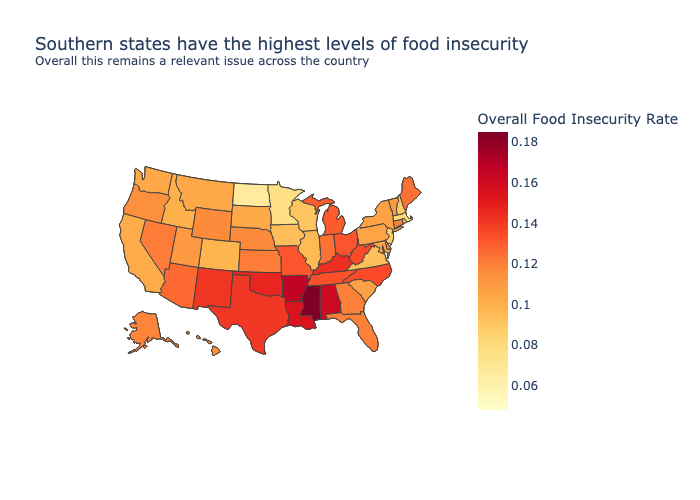

In [63]:
fig_map = px.choropleth(food_df,locations='State', 
                        locationmode="USA-states",
                        color='Overall Food Insecurity Rate ',color_continuous_scale=px.colors.sequential.YlOrRd,#  px.colors.sequential.Blues
                        scope="usa", title= "Southern states have the highest levels of food insecurity <br><sup>Overall this remains a relevant issue across the country</sup>",
                       )
fig_map.update_geos(
    visible=False, resolution=110, scope="usa",
    showsubunits=True, subunitcolor="Orange"
)
fig_map_img = fig_map.to_image('png')
Image(fig_map_img)

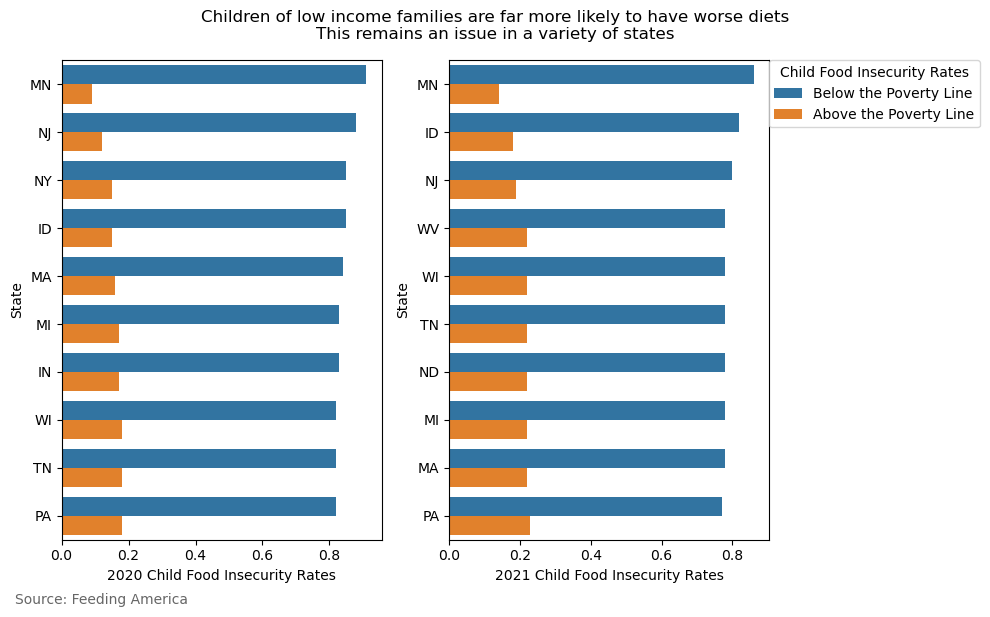

In [110]:
fig_bar, ax_bar = plt.subplots(1,2)
fig_bar.set_size_inches(10, 6) #figsize(10,6)
bar_2020 = sns.barplot(data=slope_melt[slope_melt['Year']==2020].sort_values(by=['diff','State'],ascending=False).head(20),x='value',hue='variable',y='State',ax=ax_bar[0])
bar_2021 = sns.barplot(data=slope_melt[slope_melt['Year']==2021].sort_values(by=['diff','State'],ascending=False).head(20),x='value',hue='variable',y='State',ax=ax_bar[1])
#sns.barplot(data=slope_df[slope_df['Year']==2020].sort_values(by=['diff'],ascending=True).head(15),x='above',color='#E69F00',y='State',ax=ax_bar1[0])

#sns.barplot(data=slope_df[slope_df['Year']==2021].sort_values(by=['diff'],ascending=True).head(15),x='above',color='#E69F00',y='State',ax=ax_bar1[1])
#bar_disp_handles = [Line2D([0], [0], color=bar_2020.get_lines()[0].get_color(), label='Below the Poverty Line'),Line2D([0], [0], color=bar_2020.get_lines()[1].get_color(), label='Above the Poverty Line')]
bar_labels = ['Below the Poverty Line','Above the Poverty Line']
ax_bar[0].legend_.remove()

plt.suptitle('Children of low income families are far more likely to have worse diets\nThis remains an issue in a variety of states')
h, l = ax_bar[0].get_legend_handles_labels()
#ax.legend(h, labels, title="Child Food Insecurity Rates")
ax_bar[1].legend(title="Child Food Insecurity Rates",handles=h, labels=bar_labels,bbox_to_anchor=(1,1),borderaxespad=0)
ax_bar[0].set_xlabel('2020 Child Food Insecurity Rates')
ax_bar[1].set_xlabel('2021 Child Food Insecurity Rates')
plt.tight_layout()
plt.figtext(x=0.02,y=-0.01,s='Source: Feeding America',alpha=0.6)
plt.show();

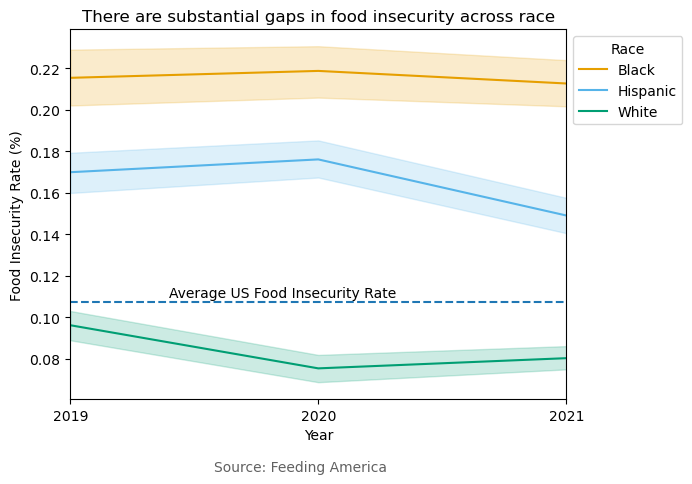

In [111]:
b_insec = sns.lineplot(data=region_food_df,x='Year',y='black_insec_rate',legend ='full',color='#E69F00')
h_insec = sns.lineplot(data=region_food_df,x='Year',y='hispanic_insec_rate',color='#56B4E9').set_title('There are substantial gaps in food insecurity across race')
w_insec = sns.lineplot(data=region_food_df,x='Year',y='white_insec_rate',color='#009E73')
race_insec_handles = [Line2D([0], [0], color='#E69F00', label='Black'),
                     Line2D([0], [0], color='#56B4E9', label='Hispanic'),
                     Line2D([0], [0], color='#009E73', label='White'),]
plt.axhline(y=region_food_df.overall_insec_rate.mean(),linestyle='--')
plt.xticks(ticks=[2019,2020,2021])
plt.xlim(2019,2021)
plt.annotate(text='Average US Food Insecurity Rate',xy=(2019.4,.11))
plt.legend(title='Race',handles=race_insec_handles,bbox_to_anchor=(1,1))
plt.ylabel('Food Insecurity Rate (%)')
plt.figtext(x=0.35,y=-.04,s='Source: Feeding America',alpha=0.62)
plt.show();

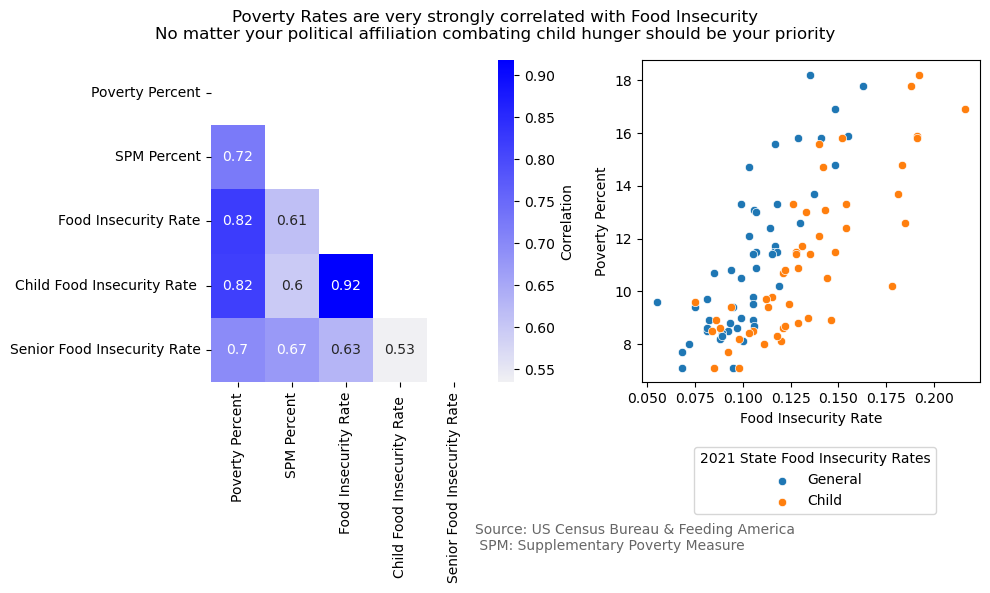

In [53]:
fig_corr, ax_corr = plt.subplots(1,2)
fd_2021 = food_compare_df[food_compare_df['Year']==2021]
food_pov_state_df = pd.merge(state_pov.filter(regex='State|Poverty Percent|SPM Percent'),fd_2021,how='left',left_on='State',right_on='State Name',suffixes=[None,'_y'])
#https://stackoverflow.com/questions/57414771/how-to-plot-only-the-lower-triangle-of-a-seaborn-heatmap
food_st_pov_corr= food_pov_state_df.filter(regex='.*perc.*|.*Rate.*|.*Perc.*').corr()
fig_corr.set_size_inches(10,6)
mat = np.triu(food_st_pov_corr)

# using the upper triangle matrix as mask 
sns.heatmap(food_st_pov_corr, annot=True, mask=mat,cmap = sns.color_palette("light:b", as_cmap=True),cbar_kws={'label': 'Correlation'},ax=ax_corr[0])
gen_scat = sns.scatterplot(data=food_pov_state_df,x='Food Insecurity Rate',y='Poverty Percent',label='General',ax=ax_corr[1])
child_scat = sns.scatterplot(data=food_pov_state_df,x='Child Food Insecurity Rate ',y='Poverty Percent',label='Child',ax=ax_corr[1])

scat_handles, scat_labels  =  child_scat.get_legend_handles_labels()
plt.annotate(text='MS',xy=(.165,.18),fontsize=8)
plt.annotate(text='LA',xy=(.21,.163),fontsize=8)
plt.annotate(text='NM',xy=(.194,.18),fontsize=8)
plt.annotate(text='AK',xy=(.192,.163),fontsize=8)
ax_corr[1].legend(title='2021 State Food Insecurity Rates',handles=scat_handles, labels=scat_labels,bbox_to_anchor=(0.87,-0.2),borderaxespad=0)
#ax_corr[0].set_title()
plt.suptitle('Poverty Rates are very strongly correlated with Food Insecurity\nNo matter your political affiliation combating child hunger should be your priority')
plt.figtext(x=0.48,y=0.08,s='Source: US Census Bureau & Feeding America\n SPM: Supplementary Poverty Measure',alpha=0.6)
plt.tight_layout()
plt.show();

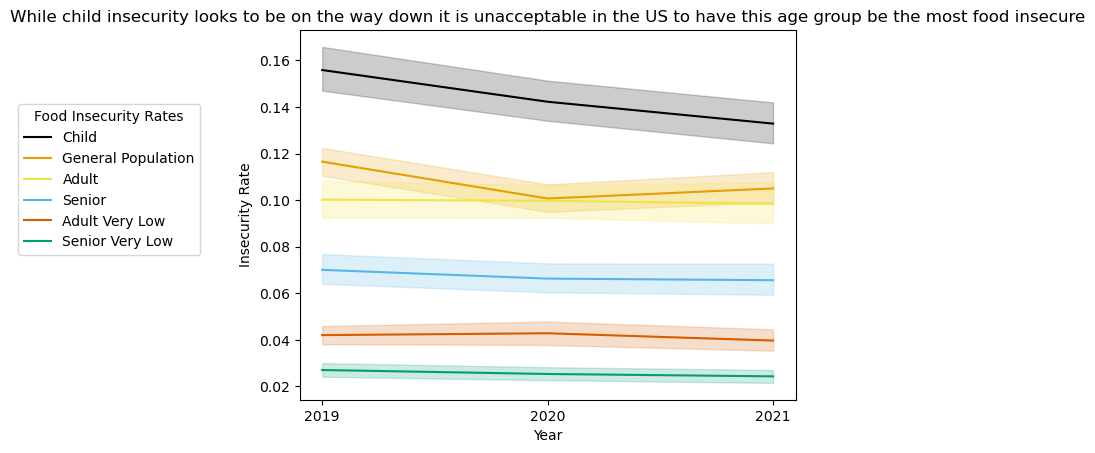

In [29]:
age_melt_df = pd.melt(food_age_df, id_vars=['Year','State'], value_vars=['gen_insec_rate', 'senior_insec_rate',
       'senior_bad_insec_rate', 'adult_insec_rate', 'adult_bad_insec_rate',
       'child_insec_rate'])
#CC79A7
#sns.lineplot(food_age_df,x='Year',y='child_insec_rate')
#sns.lineplot(food_age_df,x='Year',y='adult_bad_insec_rate')
age_melt_plot = sns.lineplot(age_melt_df,x='Year',y='value',hue='variable',palette=['#E69F00','#56B4E9','#009E73','#F0E442','#D55E00','#000000'])

legend_handles = [Line2D([0], [0], color=age_melt_plot.get_lines()[5].get_color(), label='Child'),
                  Line2D([0], [0], color=age_melt_plot.get_lines()[0].get_color(), label='General Population'),
                  Line2D([0], [0], color=age_melt_plot.get_lines()[3].get_color(), label='Adult'),
                  Line2D([0], [0], color=age_melt_plot.get_lines()[1].get_color(), label='Senior'),
                 Line2D([0], [0], color=age_melt_plot.get_lines()[4].get_color(), label='Adult Very Low'),
                  Line2D([0], [0], color=age_melt_plot.get_lines()[2].get_color(), label='Senior Very Low')
                 ]

plt.legend(title='Food Insecurity Rates',handles=legend_handles,bbox_to_anchor=(-0.2,0.8),borderaxespad=0)
plt.xticks([2019, 2020, 2021])
#plt.legend(labels=['General Insecurity Rate','', 'Senior Insecurity Rate', '','Senior Low Insecurity Rate','', 'Adult Insecurity Rate','', 'Adult Low Insecurity Rate', '','Child Insecurity Rate'])
plt.title('While child insecurity looks to be on the way down it is unacceptable in the US to have this age group be the most food insecure')
plt.xlabel('Year')
plt.ylabel('Insecurity Rate')
plt.show();

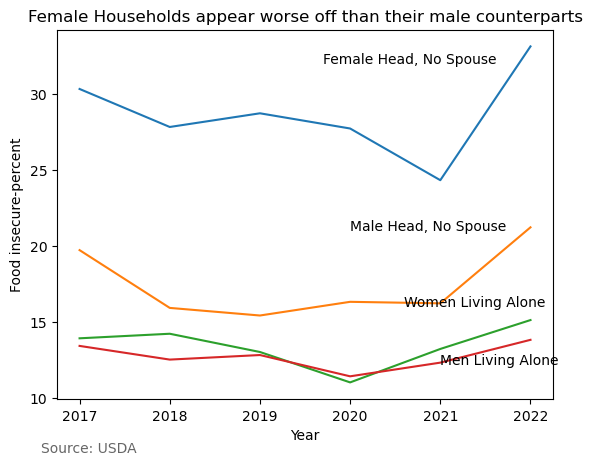

In [62]:
fig_gend, ax_gend = plt.subplots(1,1)
gend = sns.lineplot(data=subset_gender,x='Year',y='Food insecure-percent',hue='Sub-subcategory')
plt.annotate(text='Female Head, No Spouse',xy=(2019.7,32))
plt.annotate(text='Male Head, No Spouse',xy=(2020,21))
plt.annotate(text='Women Living Alone',xy=(2020.6,16))
plt.annotate(text='Men Living Alone',xy=(2021,12.2))
ax_gend.get_legend().set_visible(False)
plt.title('Female Households appear worse off than their male counterparts') 
plt.figtext(x=0.1,y=0.0,s='Source: USDA',alpha=0.6)
plt.show();

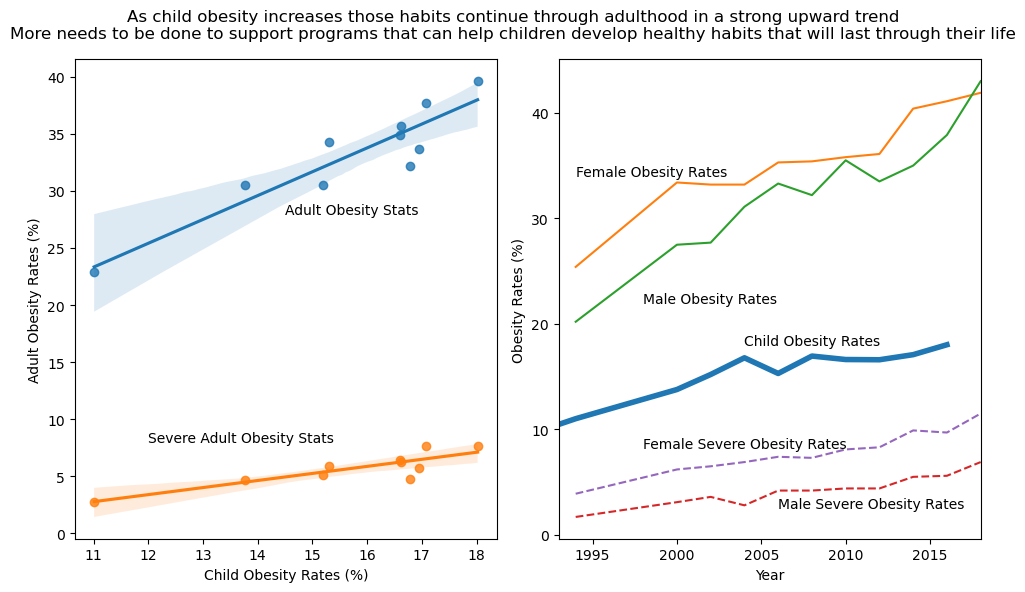

In [38]:
fig_reg, (ax_reg) = plt.subplots(1,2)
fig_reg.set_size_inches(10,6)
sns.regplot(data=obese_full_df,x='rate',y='all_obesity',scatter=True,ax=ax_reg[0])
sns.regplot(data=obese_full_df,x='rate',y='all_severe_obesity',scatter=True,ax=ax_reg[0])
sns.lineplot(data=child_obese_melt_df,x='year',y='rate',ax=ax_reg[1],linewidth=4)
sns.lineplot(data=obese_df,x='end_survey',y='female_obesity',ax=ax_reg[1])
sns.lineplot(data=obese_df,x='end_survey',y='male_obesity',ax=ax_reg[1])
sns.lineplot(data=obese_df,x='end_survey',y='male_severe_obesity',linestyle='--',ax=ax_reg[1])
sns.lineplot(data=obese_df,x='end_survey',y='female_severe_obesity',linestyle='--',ax=ax_reg[1])
ax_reg[1].annotate('Child Obesity Rates',xy=(2004,18))
ax_reg[1].annotate('Female Severe Obesity Rates',xy=(1998,8.25))
ax_reg[1].annotate('Male Severe Obesity Rates',xy=(2006,2.5))
ax_reg[1].annotate('Male Obesity Rates',xy=(1998,22))
ax_reg[1].annotate('Female Obesity Rates',xy=(1994,34))

ax_reg[1].set_xlim(1993,2018)
ax_reg[0].annotate('Severe Adult Obesity Stats',xy=(12,8))
ax_reg[0].annotate('Adult Obesity Stats',xy=(14.5,28))
ax_reg[0].set_ylabel('Adult Obesity Rates (%)')
ax_reg[0].set_xlabel('Child Obesity Rates (%)')

ax_reg[1].set_ylabel('Obesity Rates (%)')
ax_reg[1].set_xlabel('Year')
plt.suptitle('As child obesity increases those habits continue through adulthood in a strong upward trend\nMore needs to be done to support programs that can help children develop healthy habits that will last through their life')
plt.tight_layout()
plt.show();